In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip -uq "/content/gdrive/My Drive/Galaxy_Zoo/data.zip" -d '/content/'

In [0]:
!unzip -uq "/content/gdrive/My Drive/Galaxy_Zoo/testing.zip" -d '/content/'

In [5]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [7]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 39.4MB/s 
     |████████████████████████████████| 450kB 49.9MB/s 
     |████████████████████████████████| 81kB 14.2MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorboard, numpy, termcolor, grpcio, absl-py, wrapt, tensorflow-estimator, wheel, scipy, keras-preprocessing, keras-applications, protobuf, astor, six, gast, google-pasta, opt-einsum
Required-by: stable-baselines, magenta, fancyimpute


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1731008606552165676
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5219788032420744284
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13403561592332353229
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6842254534990531405
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
import pandas as pd
import os, random, shutil

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#DIR = '/content/gdrive/My Drive/Galaxy_Zoo/'
DIR = '/content/'

train_dir = DIR + 'data/train'
validation_dir = DIR + 'data/validation'

In [0]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [7]:
train_datagen

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size=32,                                      
                                                         class_mode='categorical')

Found 8044 images belonging to 3 classes.
Found 3450 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                             steps_per_epoch=8044/32,
                             epochs = 10,
                             validation_data = validation_generator,
                             validation_steps= 3450/32,
                             verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 251.375 steps, validate for 107.8125 steps
Epoch 1/10
252/251 [==============================] - 40s 158ms/step - loss: 0.7004 - accuracy: 0.6140 - val_loss: 0.5530 - val_accuracy: 0.7084
Epoch 2/10
252/251 [==============================] - 33s 131ms/step - loss: 0.5396 - accuracy: 0.7157 - val_loss: 0.4987 - val_accuracy: 0.7777
Epoch 3/10
252/251 [==============================] - 32s 128ms/step - loss: 0.4742 - accuracy: 0.7685 - val_loss: 0.4507 - val_accuracy: 0.7774
Epoch 4/10
252/251 [==============================] - 33s 131ms/step - loss: 0.4208 - accuracy: 0.8054 - val_loss: 0.3777 - val_accuracy: 0.8342
Epoch 5/10
252/251 [==============================] - 32s 129ms/step - loss: 0.3780 - accuracy: 0.8299 - val_loss: 0.4102 - val_accuracy: 0.8165
Epoch 6/10
252/251 [==============================] - 33s 130ms/step - loss: 0.3322 - accuracy: 

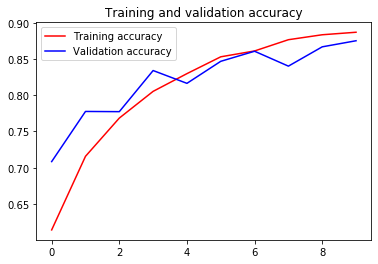

In [13]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

In [0]:
model.save('my_model.h5')

In [0]:
ls

data/  gdrive/  __MACOSX/  my_model.h5  sample_data/


In [0]:
model

[[1. 0. 0.]]


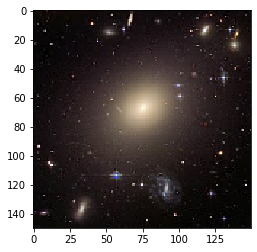

In [14]:
img = image.load_img(os.path.join('testing', 'other-elliptical.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[1. 0. 0.]]


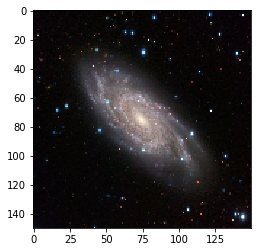

In [21]:
img = image.load_img(os.path.join('testing', 'other-spiral.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[1. 0. 0.]]


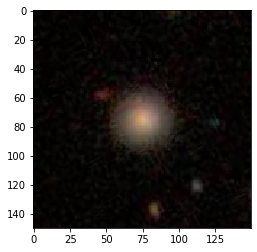

In [16]:
img = image.load_img(os.path.join('testing', 'elliptical-1.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

elliptical-2.jpg [[1. 0. 0.]]
spiral-1.jpg [[0. 0. 1.]]
spiral-2.jpg [[0. 0. 1.]]
other-elliptical.jpg [[1. 0. 0.]]
elliptical-1.jpg [[1. 0. 0.]]
elliptical-3.jpg [[0. 0. 1.]]


ValueError: ignored

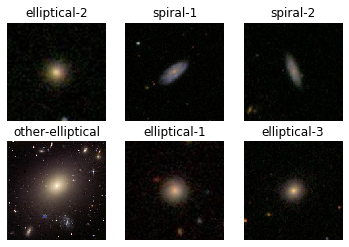

In [17]:
for num, file in enumerate(os.listdir('testing')):
    img = image.load_img(os.path.join('testing', file) , target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    plt.subplot(2, 3, num+1)
    plt.title(file.split('.')[0])
    plt.axis('off')
    plt.imshow(img)
    print(file, classes)